In [15]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import random
from scipy import stats
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import pickle

In [16]:
def ReturnLayer(image, layer = "Max", seperate = True, print_k = True):
    
    high_depth_image = pywt.wavedec2(image, 'db1')
    k = len(high_depth_image)
    if print_k:
        print(k)
    if layer == "Max":
        level = high_depth_image[k-1]
    else:
        level = high_depth_image[layer-1]
    if seperate:
        return np.array(level)
    else:
        a = level[0]
        for arr in level[1:]:
            #print(a.shape, arr.shape)
            a = np.append(a, arr, axis= 1)
        level = a
        return np.array(level)


        

In [17]:
def density_of_layer(flat_layers, method = 0.2, diagonal = True, without_diagonal = False, title = ""):
    
    layer_names = ["Horizantal", "Vertical", "Diagonal"]
    
    if(diagonal):
        fig, axes = plt.subplots(1, 2, figsize=(24, 6))
        fig.suptitle(title)
        for i in range(len(flat_layers)):
            axes[1].set_ylim(bottom = 10**-5, top= 10)
            sns.kdeplot(ax = axes[0], x = flat_layers[i], bw_method = method, label = layer_names[i])
            sns.kdeplot(ax = axes[1], x = flat_layers[i], bw_method = method, log_scale=[False, True], label = layer_names[i])
            axes[0].legend()
            axes[1].legend()
    if(without_diagonal):
        fig, axes = plt.subplots(1, 2, figsize=(24, 6))
        fig.suptitle(title)
        for i in range(len(flat_layers[:-1])):
            axes[1].set_ylim(bottom = 10**-5, top= 10)
            sns.kdeplot(ax = axes[0], x = flat_layers[i], bw_method = method,label = layer_names[i])
            sns.kdeplot(ax = axes[1], x = flat_layers[i], bw_method = method, log_scale=[False, True],label = layer_names[i])
            axes[0].legend()
            axes[1].legend()
            
    return np.cov(flat_layers)


In [18]:
with open("Converted Panoptic Agricultural Data/Toy_Data_Dict_Normalized.pickle", 'rb') as handle:
    full_dict = pickle.load(handle)
#layer["Array"] = layer["Array Bytes"].map(readArrayBytes)

In [19]:
layer = full_dict[5]
flat_layer = [np.concatenate(layer[layer["Orientation"] == direction]["Flattened Data"].values.flatten()) for direction in ['Horizontal detail', 'Vertical detail', 'Diagonal detail']]


array([[20.96305469,  0.77119106,  0.10495776],
       [ 0.77119106, 19.80843422,  0.03221036],
       [ 0.10495776,  0.03221036,  6.83320867]])

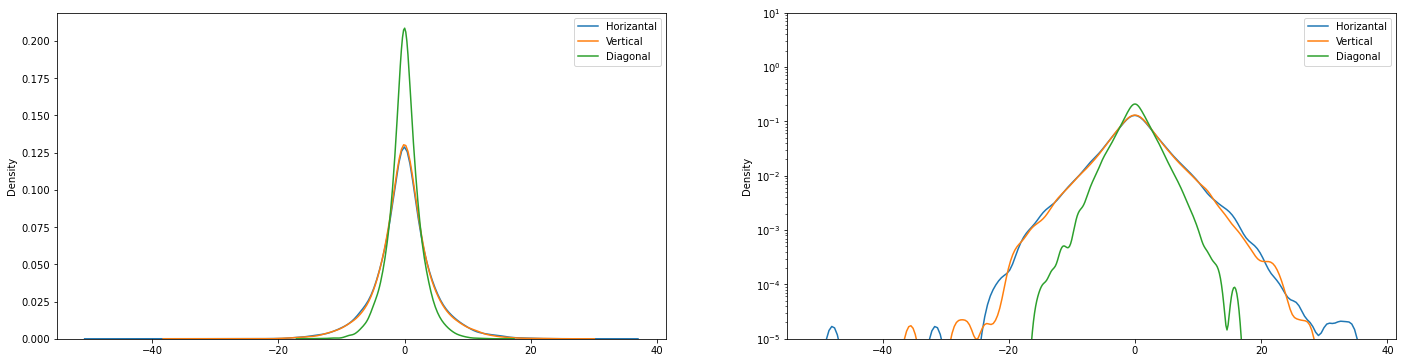

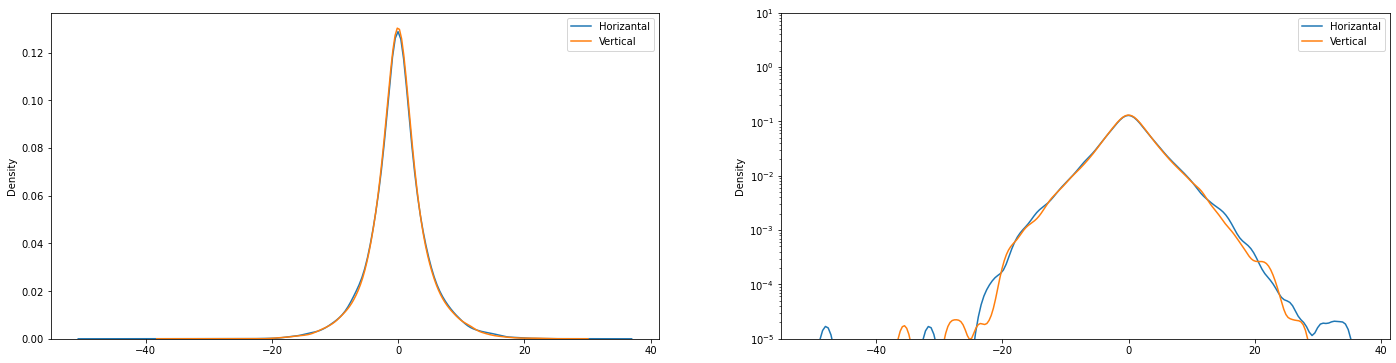

In [20]:
density_of_layer(flat_layer, method = 0.2, diagonal = True, without_diagonal = True)

<AxesSubplot:ylabel='Density'>

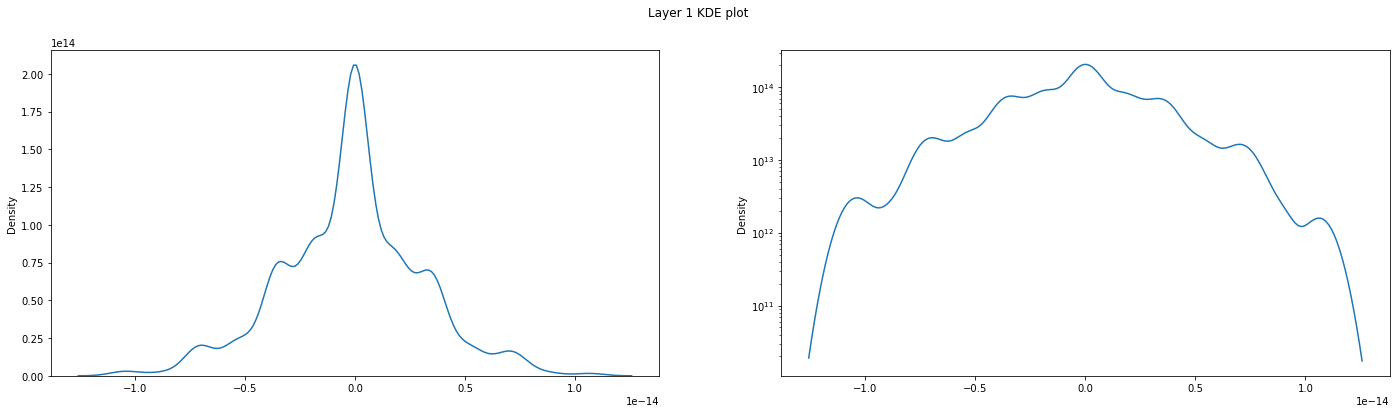

In [21]:
layer = full_dict[1]
flat_layer = np.concatenate(layer["Flattened Data"])
fig, axes = plt.subplots(1, 2, figsize=(24, 6))
fig.suptitle("Layer 1 KDE plot")
sns.kdeplot(ax = axes[0], x = flat_layer, bw_method = 0.2)
sns.kdeplot(ax = axes[1], x = flat_layer, bw_method = 0.2, log_scale=[False, True])

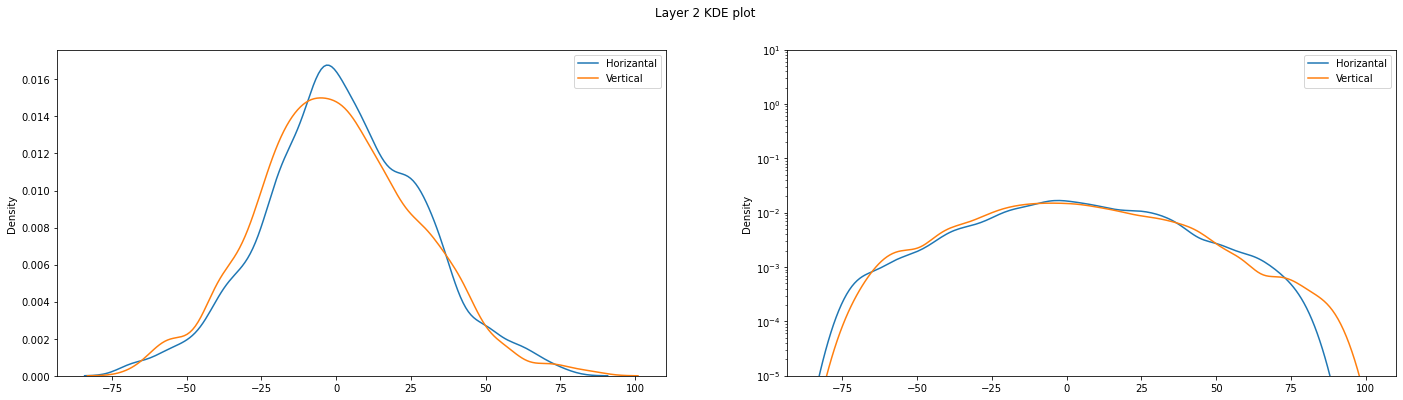

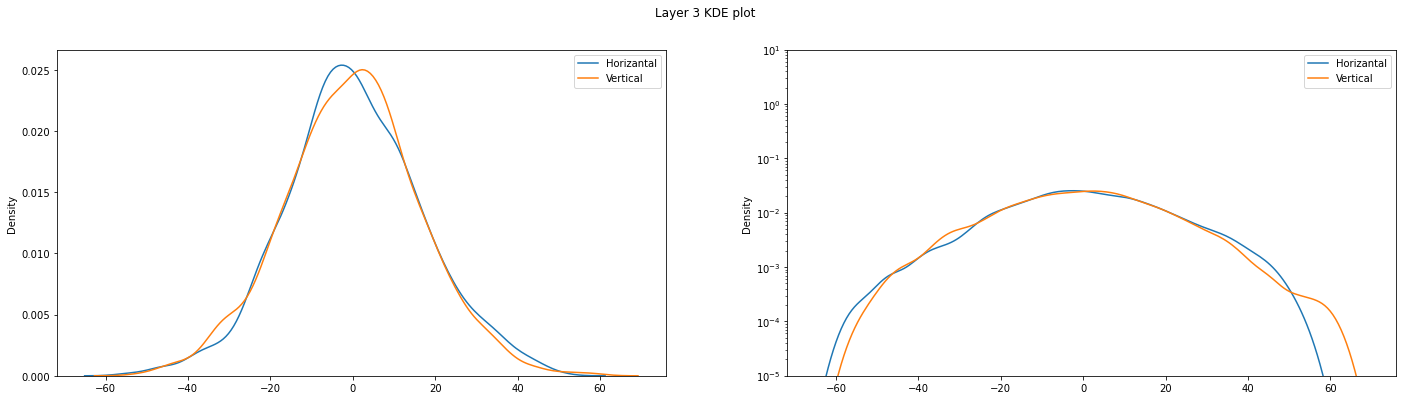

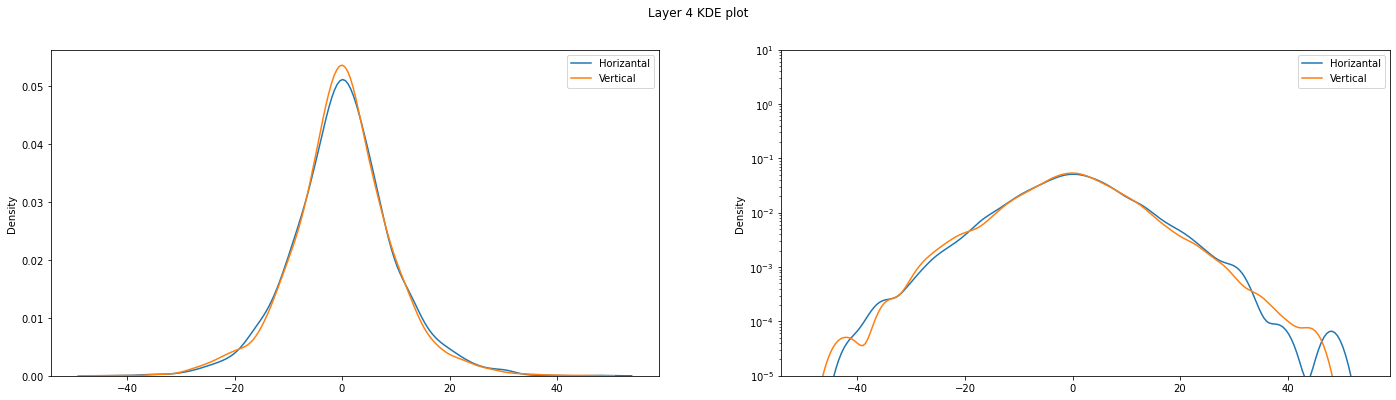

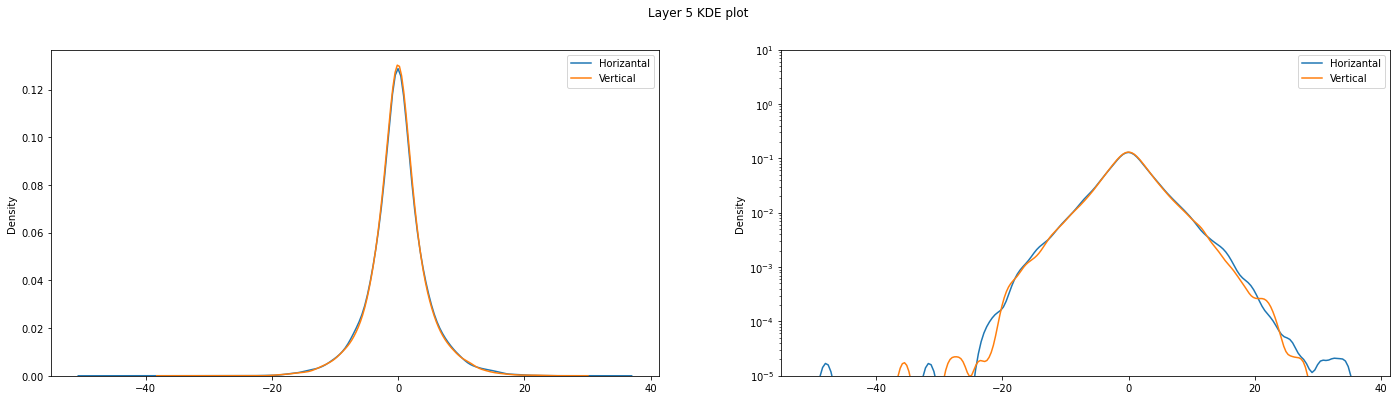

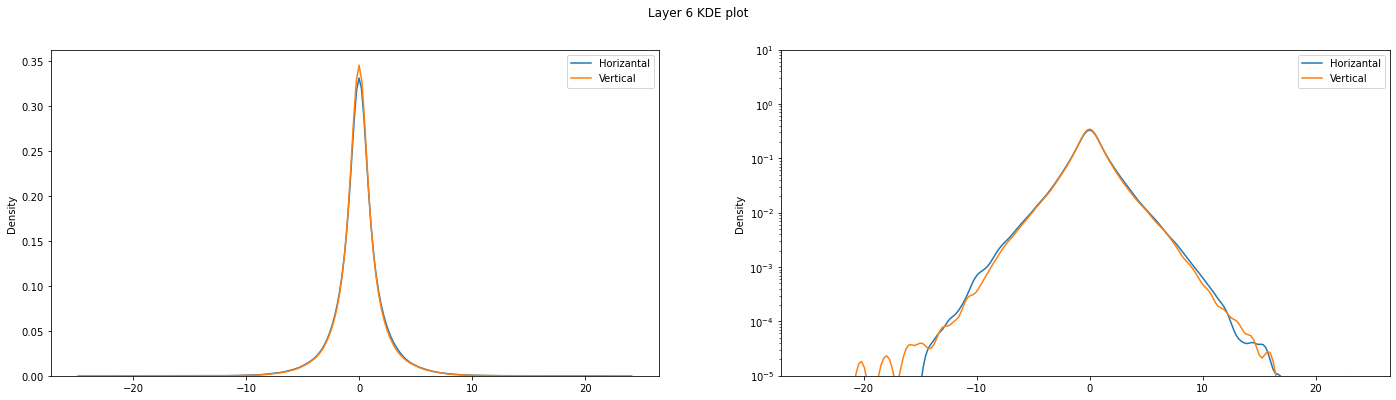

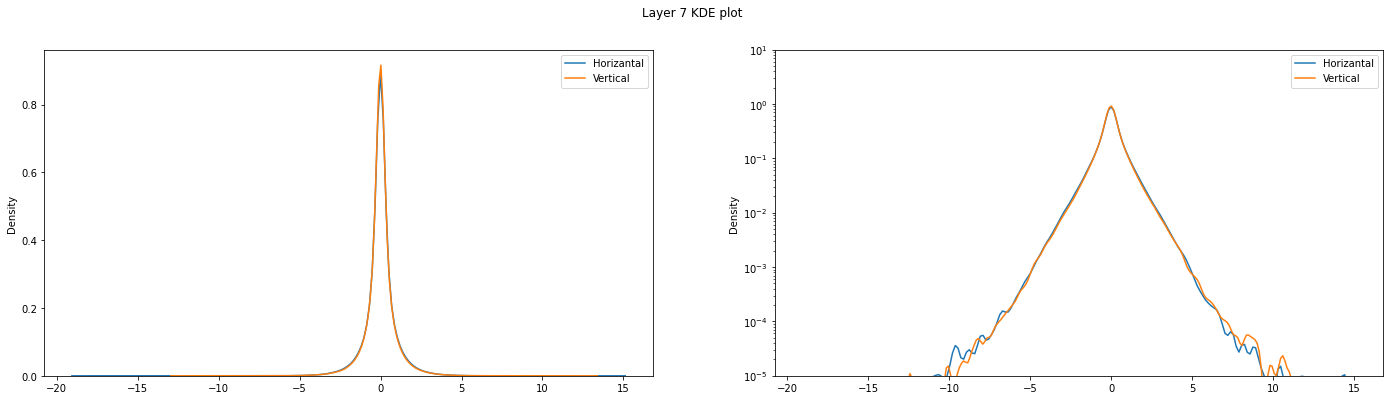

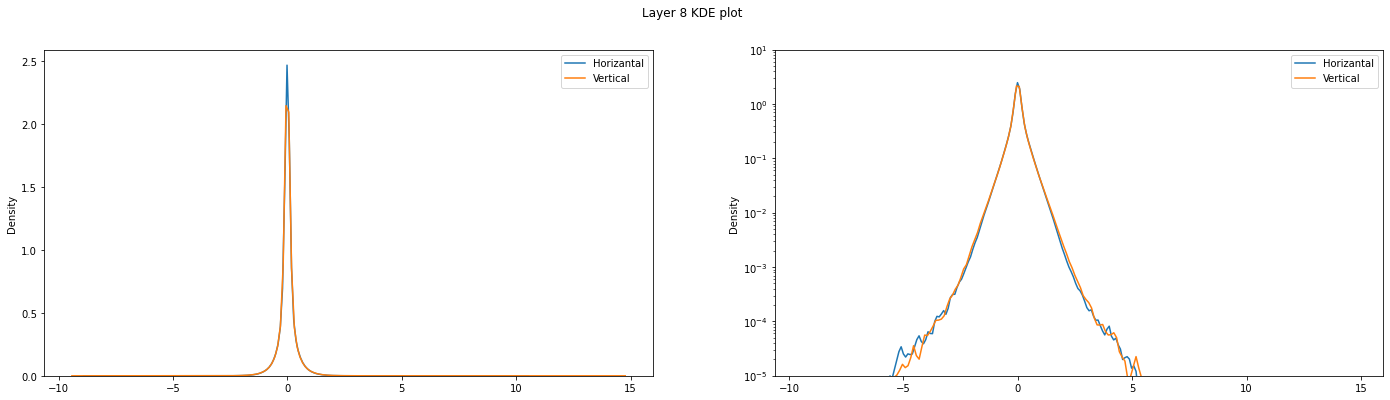

In [22]:
for i in range(2, 9):
    layer = full_dict[i]
    flat_layer = [np.concatenate(layer[layer["Orientation"] == direction]["Flattened Data"].values) for direction in ['Horizontal detail', 'Vertical detail', 'Diagonal detail']]
    density_of_layer(flat_layer, method = 0.2, diagonal = False, without_diagonal = True, title="Layer "+str(i)+" KDE plot")